# A GitHub Account Recommendation Engine

## Introduction:

A recommendation engine works by using filtering methods/algorithms on user data and based on the past behaviour of a user, it is able to recommend the most relevant items. Interestingly, while most people have known that a recommendation engine are tools that will find closely related products, topics, music or movies that the user would appreciate, the original recommendation engine was built for finding potential partners. This project aims to explore the ways and the processes that a recommendation engine can be built on. This project will also implement a recommendation engine for finding related GitHub repositories.

Source: https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/

## Breakdown of this Project:
- Collaborative Filtering
- Content-based Filtering
- Hybrid Systems
- Building the GitHub Account Recommendation Engine

## 1 Collaborative Filtering:

Collaborative filtering is based on the idea that if a user (A) have rated some set of items similarly to another user (B), but each users would also have rated additional items that the other one has not. This establishes the fact that the users (A and B) would have similar taste. A recommendation engine would able to generate items that the other user (B) have rated highly and serve it up to user A. 

## 1.1 Import the required libraries:

In [1]:
import pandas as pd
import numpy as np
import os

# Import the image displayer:
from IPython.display import Image
from IPython.core.display import Image, display ,HTML

pd.set_option('display.max_colwidth', 200)

## 1.2 User-to-User Collaborative filtering:

It is where an algorithm is used to firstly find the similarity score between users. After this, it will choose the most similar users to recommend products to based on the similarity score. The prediction of a particular item for a given user is done by computing the weighted sum of the user ratings given by other users to the item of interest. The following shows the formula:

In [2]:
# Set the pathway to the images: save the images in a folder called 'images'
image_path = os.getcwd() + '/Description Images/'
# print(image_path)

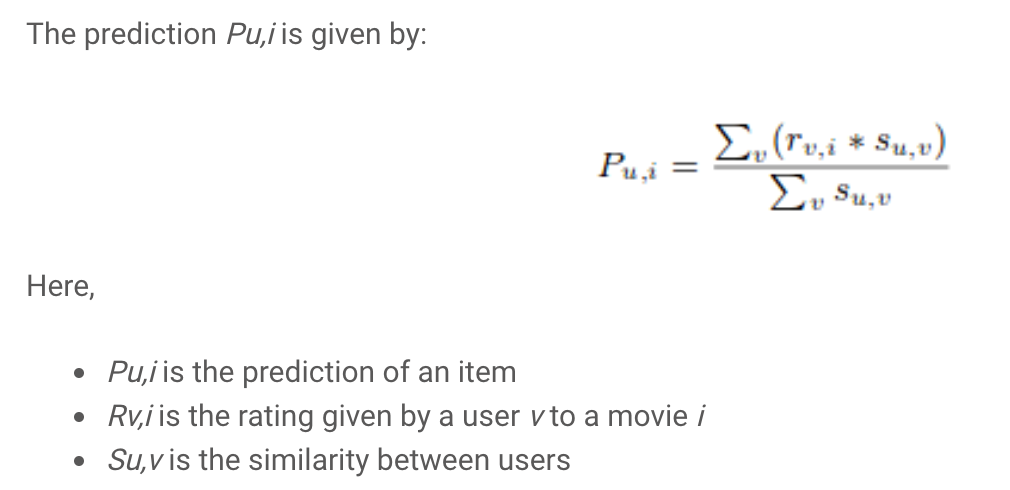

Source -> https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/


In [3]:
display(Image(filename = image_path + "UserUser collaborative filtering 1.png", width=500, unconfined=True))
print('Source -> https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/')

It should be noted that the algorithm can be taxing and time comsuming, as this is due to the computation required for each user. It is advisible to compute the similarity for a few users at a time to make the predictions. The group of users can be selected in various ways such as the following:

- Select a threshold similarity and choose all the users above that value
- Randomly select the users
- Arrange the neighbors in descending order of their similarity value and choose top-N users
- Use clustering for choosing neighbors

Source: https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/

## 1.3 For example, lets start with a Utility Matrix consisting of different products and users:

Here the users are the rows (start from User A to D) and the products are the columns. The products are then rated from a scale of 0 to 5.

In [4]:
# Utility Matrix consisting of different products and users:

# Data:
customer_index =['A', 'B', 'C', 'D']

product_data = [{'Potato Chips': 4, 'Smooth Lotion': 0, 'Beer':5, 'Water':3, 'Football Jersey':5, 'Cotton Balls':0, 'Diapers':0}, 
                {'Potato Chips': 0, 'Smooth Lotion': 4, 'Beer':0, 'Water':4, 'Football Jersey':0, 'Cotton Balls':5, 'Diapers':0}, 
                {'Potato Chips': 2, 'Smooth Lotion': 0, 'Beer':2, 'Water':0, 'Football Jersey':1, 'Cotton Balls':0, 'Diapers':0}, 
                {'Potato Chips': 0, 'Smooth Lotion': 5, 'Beer':0, 'Water':3, 'Football Jersey':0, 'Cotton Balls':5, 'Diapers':4}]

# Save to the data to a Dataframe:
utility_mat_1 = pd.DataFrame(data=product_data, index=customer_index)
utility_mat_1.index.name = 'Customer'
utility_mat_1

,Potato Chips,Smooth Lotion,Beer,Water,Football Jersey,Cotton Balls,Diapers
Customer,,,,,,,
A,4,0,5,3,5,0,0
B,0,4,0,4,0,5,0
C,2,0,2,0,1,0,0
D,0,5,0,3,0,5,4


#### Use the cosine similarity to compare the similarities of rated items between the users:

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
# Compare -> User A to User B:

User_A_dat = np.array([4 ,0 ,5, 3, 5, 0, 0])
User_B_dat = np.array([0 ,4, 0, 4, 0, 5, 0])

cosine_similarity(User_A_dat.reshape(1,-1), User_B_dat.reshape(1,-1))

array([[0.18353259]])

Here it shows that both User A and B are not highly similar, and this can be seen to be true as they dont have anything in common.

In [7]:
# Compare -> User A to User C:

User_A_dat = np.array([4 ,0 ,5, 3, 5, 0, 0])
User_C_dat = np.array([2, 0, 2, 0, 1, 0, 0])

cosine_similarity(User_A_dat.reshape(1,-1), User_C_dat.reshape(1,-1))

array([[0.88527041]])

Here it shows that both User A and C are  highly similar even though the same products were rated differently by the users. At first, this high similarity rating might seems trivial, however there is a problem with the rating system. The problem is the usage of '0' for the products where zero here does not neccessarily means the product is rated as neutral. There is a need to account for negative ratings amongst these products. 

## 1.4 Apply the fix:

The fix can be done by re-centering each of the user's ratings. This would mean that a '0' rating is set to neutral. The fix is applied by taking the rating from each user and subtracting the mean of all the ratings for this particular user. 

Example: for User A, the mean calculated is 4.25. Taking every individual rating of this user and subtracting it by this mean. This same method is applied to the other users. 

#### The table should be fixed and can be seen as:

Only taking the values that are rated by the user.

In [8]:
utility_mat_1_mean = utility_mat_1.replace(0, np.NaN)
utility_mat_1_mean = utility_mat_1_mean.mean(axis = 1) 

In [9]:
utility_mat_1_mean

Customer
A    4.250000
B    4.333333
C    1.666667
D    4.250000
dtype: float64

These are the mean calculated from the each user.

#### Create a new Dataframe with the updated information:

This is done manually as the dataset is very small, so no code to update the values are required.

In [10]:
# Utility Matrix consisting of different products and users:

# Data:
customer_index =['A', 'B', 'C', 'D']

product_data = [{'Potato Chips': 4 - 4.250000, 'Smooth Lotion': 0, 'Beer':5 - 4.250000, 'Water':3 - 4.250000, 'Football Jersey':5 - 4.250000, 'Cotton Balls':0, 'Diapers':0}, 
                {'Potato Chips': 0, 'Smooth Lotion': 4 - 4.333333, 'Beer':0, 'Water':4 - 4.333333, 'Football Jersey':0, 'Cotton Balls':5- 4.333333, 'Diapers':0}, 
                {'Potato Chips': 2- 1.666667, 'Smooth Lotion': 0, 'Beer':2 - 1.666667, 'Water':0, 'Football Jersey':1- 1.666667, 'Cotton Balls':0, 'Diapers':0}, 
                {'Potato Chips': 0, 'Smooth Lotion': 5 - 4.250000, 'Beer':0, 'Water':3 - 4.250000, 'Football Jersey':0, 'Cotton Balls':5 - 4.250000, 'Diapers':4 - 4.250000}]

# Save to the data to a Dataframe:
utility_mat_2 = pd.DataFrame(data=product_data, index=customer_index)
utility_mat_2.index.name = 'Customer'
utility_mat_2

,Potato Chips,Smooth Lotion,Beer,Water,Football Jersey,Cotton Balls,Diapers
Customer,,,,,,,
A,-0.250000,0.000000,0.750000,-1.250000,0.750000,0.000000,0.00
B,0.000000,-0.333333,0.000000,-0.333333,0.000000,0.666667,0.00
C,0.333333,0.000000,0.333333,0.000000,-0.666667,0.000000,0.00
D,0.000000,0.750000,0.000000,-1.250000,0.000000,0.750000,-0.25


#### Use the NEW cosine similarity to compare the similarities of rated items between the users:

In [11]:
# Compare -> User A to User B:

User_A_dat = np.array([-0.250000, 0.000000, 0.750000, -1.250000, 0.75, 0.000000, 0.00])
User_B_dat = np.array([0.000000	, -0.333333, 0.00000, -0.333333, 0.00, 0.666667, 0.00])

cosine_similarity(User_A_dat.reshape(1,-1), User_B_dat.reshape(1,-1))

array([[0.30772842]])

In [12]:
# Compare -> User A to User C:

User_A_dat = np.array([-0.250000, 0.000000, 0.750000, -1.250000, 0.75, 0.000000, 0.00])
User_C_dat = np.array([0.333333, 0.000000, 0.333333, 0.000000, -0.666667, 0.000000, 0.00])

cosine_similarity(User_A_dat.reshape(1,-1), User_C_dat.reshape(1,-1))

array([[-0.24618329]])

#### Observation:

Immediately the similarity between User A and B have increases from 0.18 to 0.31 (rounded), where on the other hand, the similarity between User A and C has decreased significantly from 0.88 to -0.24. 

NOTE: The centering process applied to the data is useful as it has help to deal with missing values and has centered the values around a mean of 0. This is also equivalent to Pearson Correlation, where the values would fall between -1 and 1.

## 2 Predict the Rating for the Product:

Here, the example shown would take the framework from the previous section and apply it to predict the rating for a product. There will be 3 person (X, Y, Z) taken into consideration. The idea would be to predict a product that person X has not rated yet while person Y and Z (who are similar to person X) have already rated the product.

In [13]:
# Utility Matrix consisting of different products and users:

# Data:
customer_index =['X', 'Y', 'Z']

product_data = [{'Potato Chips': 0, 'Smooth Lotion': 4, 'Beer':0, 'Water':3 , 'Football Jersey':0, 'Cotton Balls':4, 'Diapers':0}, 
                {'Potato Chips': 0, 'Smooth Lotion': 3.5, 'Beer':0, 'Water':2.5, 'Football Jersey':0, 'Cotton Balls':4, 'Diapers':4}, 
                {'Potato Chips': 0, 'Smooth Lotion': 4, 'Beer':0, 'Water':3.5, 'Football Jersey':0, 'Cotton Balls':4.5, 'Diapers':4.5}]

# Save to the data to a Dataframe:
utility_mat_3 = pd.DataFrame(data=product_data, index=customer_index)
utility_mat_3.index.name = 'Customer'
utility_mat_3

,Potato Chips,Smooth Lotion,Beer,Water,Football Jersey,Cotton Balls,Diapers
Customer,,,,,,,
X,0,4.0,0,3.0,0,4.0,0.0
Y,0,3.5,0,2.5,0,4.0,4.0
Z,0,4.0,0,3.5,0,4.5,4.5


In [14]:
utility_mat_3_mean = utility_mat_3.replace(0, np.NaN).mean(axis = 1) 
utility_mat_3_mean

Customer
X    3.666667
Y    3.500000
Z    4.125000
dtype: float64

In [15]:
# Utility Matrix consisting of different products and users:

# Data:
customer_index =['X', 'Y', 'Z']

product_data = [{'Potato Chips': 0, 'Smooth Lotion': 4 - 3.666667, 'Beer':0, 'Water':3 -3.666667, 'Football Jersey':0, 'Cotton Balls':4 - 3.666667, 'Diapers':0}, 
                {'Potato Chips': 0, 'Smooth Lotion': 3.5 - 3.500000, 'Beer':0, 'Water':2.5 - 3.500000, 'Football Jersey':0, 'Cotton Balls':4 - 3.500000, 'Diapers':4 - 3.500000}, 
                {'Potato Chips': 0, 'Smooth Lotion': 4 - 4.125000, 'Beer':0, 'Water':3.5 -4.125000, 'Football Jersey':0, 'Cotton Balls':4.5 -4.125000, 'Diapers':4.5 -4.125000}]

# Save to the data to a Dataframe:
utility_mat_4 = pd.DataFrame(data=product_data, index=customer_index)
utility_mat_4.index.name = 'Customer'
utility_mat_4

,Potato Chips,Smooth Lotion,Beer,Water,Football Jersey,Cotton Balls,Diapers
Customer,,,,,,,
X,0,0.333333,0,-0.666667,0,0.333333,0.000
Y,0,0.000000,0,-1.000000,0,0.500000,0.500
Z,0,-0.125000,0,-0.625000,0,0.375000,0.375


#### What will be the likely rating that person X would rate for a given product that is Diapers?

This also includes the ratings from person Y and Z. To do this, is to calculate the weighted average according to the centered cosine similarity.

In [16]:
person_X = np.array([0, 0.333333, 0, -0.666667, 0, 0.333333, 0.000])
person_Y = np.array([0, 0.000000, 0, -1.000000, 0, 0.500000, 0.500])

cos_sim_XY = cosine_similarity(person_X.reshape(1,-1), person_Y.reshape(1,-1))
cos_sim_XY

array([[0.8333335]])

In [17]:
person_X = np.array([0, 0.333333, 0, -0.666667, 0, 0.333333, 0.000])
person_Z = np.array([0 ,-0.125000, 0, -0.625000, 0, 0.375000, 0.375])

cos_sim_XZ = cosine_similarity(person_X.reshape(1,-1), person_Z.reshape(1,-1))
cos_sim_XZ

array([[0.73854913]])

#### As the rating given to Diapers by person Y is 4.0 and for person Z is 4.5, the weighted rating similarity can be computed as the following:

In [18]:
# Set product name:
product_key = 'Diapers'

# Get the rating from dataFrame:
person_Y_rating = utility_mat_3['Diapers']['Y']
person_Z_rating = utility_mat_3['Diapers']['Z']

weighted_cos_sim = ((cos_sim_XY * person_Y_rating) + (cos_sim_XZ * person_Z_rating)) / (cos_sim_XY + cos_sim_XZ)
weighted_cos_sim

array([[4.23492502]])

#### Based on the computations above, the person X will likely rate the Diapers product to be around 4.26. 

If this person is probably going to rate this product highly, then it would be best to start sending promotion codes over.

## 2.1 Item-to-Item collaborative filtering:

It is where the algorithm will compute the similarity between each item pairs, rather than users. Similarly to User-to-user collaborative filtering, it computes the weighted sum of ratings of item-neighbours. This is where each rated item will be compared to all other items to find the items that are most similar, using centeres cosine similarity. The formula is given by:

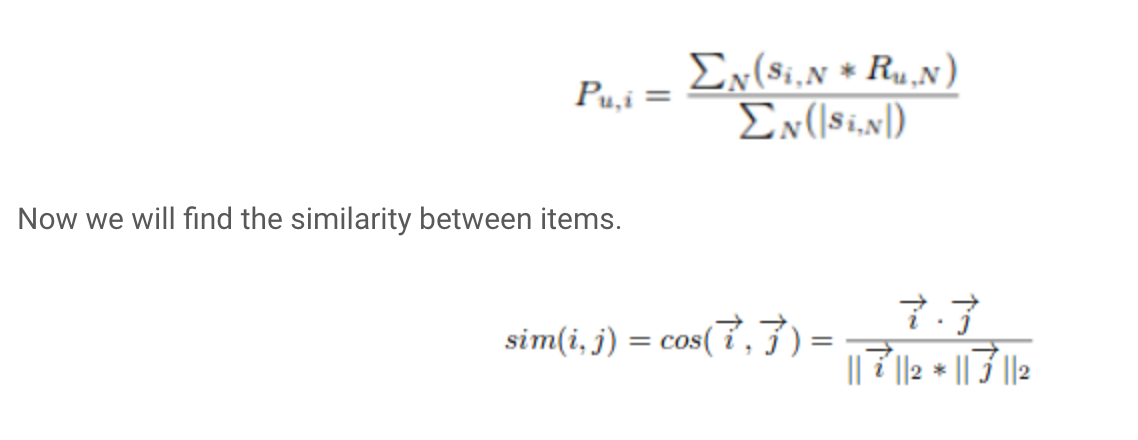

Source -> https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/


In [19]:
display(Image(filename = image_path + "ItemItem collaborative filtering 1.png", width=500, unconfined=True))
print('Source -> https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/')

## 2.2 For example, lets start with a Utility Matrix consisting of users' ratings of songs:

Here the users are the columns (start from U1 to U5) and the songs are the rows. The songs are then rated from a scale of 0 to 5.

In [20]:
# Utility Matrix consisting of users' ratings of songs:

# Data:
song_index =['S1', 'S2', 'S3', 'S4', 'S5']

user_data = [{'U1': 2, 'U2': 0, 'U3':4, 'U4':0, 'U5':5}, 
             {'U1': 0, 'U2': 3, 'U3':0, 'U4':3, 'U5':0},
             {'U1': 1, 'U2': 0, 'U3':5, 'U4':0, 'U5':4},
             {'U1': 0, 'U2': 4, 'U3':4, 'U4':4, 'U5':0},
             {'U1': 3, 'U2': 0, 'U3':0, 'U4':0, 'U5':5}]

# Save to the data to a Dataframe:
utility_mat_5 = pd.DataFrame(data=user_data, index=song_index)
utility_mat_5.index.name = 'Entity'
utility_mat_5

,U1,U2,U3,U4,U5
Entity,,,,,
S1,2,0,4,0,5
S2,0,3,0,3,0
S3,1,0,5,0,4
S4,0,4,4,4,0
S5,3,0,0,0,5


#### Use cosine similarity to find the rating that User 3 will assign for the song 5:

To do this, find the songs that similarly rated by all the users.

#### Center each song row:

In [21]:
utility_mat_5_mean = utility_mat_5.replace(0, np.NaN).mean(axis = 1) 
utility_mat_5_mean

Entity
S1    3.666667
S2    3.000000
S3    3.333333
S4    4.000000
S5    4.000000
dtype: float64

In [22]:
# Utility Matrix consisting of users' ratings of songs:

# Data:
song_index =['S1', 'S2', 'S3', 'S4', 'S5']

user_data = [{'U1': 2 - 3.666667, 'U2': 0, 'U3':4-3.666667, 'U4':0, 'U5':5-3.666667}, 
             {'U1': 0, 'U2': 3-3.000000, 'U3':0, 'U4':3-3.000000, 'U5':0},
             {'U1': 1-3.333333, 'U2': 0, 'U3':5-3.333333, 'U4':0, 'U5':4-3.333333},
             {'U1': 0, 'U2': 4-4.00000, 'U3':4-4.00000, 'U4':4-4.00000, 'U5':0},
             {'U1': 3-4.000, 'U2': 0, 'U3':0, 'U4':0, 'U5':5-4.000}]

# Save to the data to a Dataframe:
utility_mat_6 = pd.DataFrame(data=user_data, index=song_index)
utility_mat_6.index.name = 'Entity'
utility_mat_6

,U1,U2,U3,U4,U5
Entity,,,,,
S1,-1.666667,0.0,0.333333,0.0,1.333333
S2,0.000000,0.0,0.000000,0.0,0.000000
S3,-2.333333,0.0,1.666667,0.0,0.666667
S4,0.000000,0.0,0.000000,0.0,0.000000
S5,-1.000000,0.0,0.000000,0.0,1.000000


#### Calculate the cosine similarity for each of the rows against the target row (S5):

In [23]:
Song1 = np.array(utility_mat_6.loc['S1'])
Song2 = np.array(utility_mat_6.loc['S2'])
Song3 = np.array(utility_mat_6.loc['S3'])
Song4 = np.array(utility_mat_6.loc['S4'])
Song5 = np.array(utility_mat_6.loc['S5'])

# Cosine Similarity between Song 1 and 5:
cos_sim_song1_5 = cosine_similarity(Song1.reshape(1,-1), Song5.reshape(1,-1))
cos_sim_song1_5

array([[0.98198051]])

In [24]:
# Cosine Similarity between Song 2 and 5:
cos_sim_song2_5 = cosine_similarity(Song2.reshape(1,-1), Song5.reshape(1,-1))
cos_sim_song2_5

array([[0.]])

In [25]:
# Cosine Similarity between Song 3 and 5:
cos_sim_song3_5 = cosine_similarity(Song3.reshape(1,-1), Song5.reshape(1,-1))
cos_sim_song3_5

array([[0.72057669]])

In [26]:
# Cosine Similarity between Song 4 and 5:
cos_sim_song4_5 = cosine_similarity(Song4.reshape(1,-1), Song5.reshape(1,-1))
cos_sim_song4_5

array([[0.]])

In [27]:
# Cosine Similarity between Song 2 and 5:
cos_sim_song5_5 = cosine_similarity(Song5.reshape(1,-1), Song5.reshape(1,-1))
cos_sim_song5_5

array([[1.]])

In [28]:
# Save these similarity values as a column of 'utility_mat_6':
centered_cos_sim = cos_sim_song1_5[0][0], cos_sim_song2_5[0][0], cos_sim_song3_5[0][0], cos_sim_song4_5[0][0], cos_sim_song5_5[0][0]

utility_mat_6['CntrdCoSim'] = centered_cos_sim

In [29]:
# Inspect:
utility_mat_6

,U1,U2,U3,U4,U5,CntrdCoSim
Entity,,,,,,
S1,-1.666667,0.0,0.333333,0.0,1.333333,0.981981
S2,0.000000,0.0,0.000000,0.0,0.000000,0.000000
S3,-2.333333,0.0,1.666667,0.0,0.666667,0.720577
S4,0.000000,0.0,0.000000,0.0,0.000000,0.000000
S5,-1.000000,0.0,0.000000,0.0,1.000000,1.000000


#### Next, by selecting the nearest neighbours to be 2 (k=2) and using these to determine the rating for Song 5 of User 3:

From the 'CntrdCoSim' column, it can be seen that Song 1 and 3 are the most similar, so these two (k=2) neighbours' ratings would be chosen to help rate Song 5.

In [30]:
# k=2 nearest neighbours:
neighbour_1 = utility_mat_6['CntrdCoSim'][0]
neighbour_2 = utility_mat_6['CntrdCoSim'][2]

# Ratings of User 3 for the songs (S1 and S3, as these are the nearest neighbours):
U3_Song1 = utility_mat_5['U3'][0]
U3_Song3 = utility_mat_5['U3'][2]


weighted_cos_sim2 = ((neighbour_1 * U3_Song1) + (neighbour_2 * U3_Song3)) / (neighbour_1 + neighbour_2)
round(weighted_cos_sim2,2)

4.42

#### Based on the computations above, User 3 will likely rate the Song 5 to be around 4.42. 

## 2.3 User-to-User filtering is less effective then item-to-item filtering:

Different users can have similar interests and enjoy similar things, however, there would be certain aspects that would differ such as taste in music or foods. The User-to-user filtering may be less effective because it would take into consideration of the items that are highly rated by other users and suggest them even though there may be differences in taste. Whereas Item-to-item filtering will not do this and focuses more on the independent user's taste instead.

## 3 Content-based Filtering:

The previous filtering methods examins the users and items as a single entity to make comparisons.. Content-based filtering will decompase the user and items into __feature baskets__. This algorithm will help recommends products that are similar to the ones that a user has liked in the past.

The algorithm will save the information that is related to each user in a vector form. This vector form consists of past behaviour of the user such as likes and dislikes of items. This vector form is called the profile vector. The information that is related to items itself is stored in another vector called the item vector. The Item vector consists of the details pertaining to the item. The algorithm will compute the cosine of the angle between the profile vector and the item vector, then the similarity between them can be found. The following shows the formula:

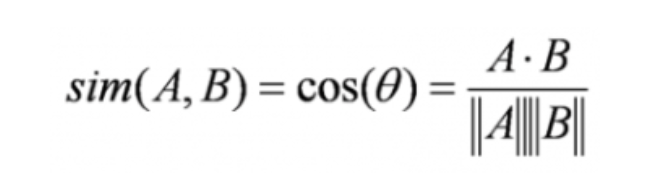

Source -> https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/


In [31]:
display(Image(filename = image_path + "Content-based Filtering formula.png", width=500, unconfined=True))
print('Source -> https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/')

## 4 Hybrid Systems:

In large-scale operation environments, most systems tend to leverage a hybrid system that consist of both content-based and collaborative filtering techniques. This is because either types of systems is able to compensate for the weaknesses of each system and therefore forms to create a more robust solution. Overall, Content-based filtering is better when the system does not have a large user base, however, collaborative filtering is better as the user base grows.

### Advantages and Disadvantages of each system:
#### 1) Collaborative filering:
##### Advantages:
- No need of hand-crafting the features.

##### Disadvantages:
- For smaller number of items and users, this system does not work well.
- There may be sparsity when the number of items dratiscally exceeds the number that could be purchased by the user.

#### 2) Content-based filtering:
##### Advantages:
- No need for large number of users.

##### Disadvantages:
- It can be a challege to define the right features.
- Lack/lower the chance of finding useful recommendations.

## 5 Build the Recommendation Engine:

The recommendation engine for this project will be focused on suggesting useful GitHub Repositories. In my experience, finding gems or really useful repos can be hard or time consuming when in a rush. This section will go through the process of building the system based on collaorative filtering and utilises the GitHub API. The idea is to use all the repos that has been starred over time and grab all of the creators of these repos, to find their repos of interest (repos that they have starred). After searching these users/creators, a compatilibity check is done to determine which is most similar to my personal interests. This is should be able to create a list of recommendations.

## 5.1 Import the required libraries:

In [32]:
import pandas as pd
import numpy as np
import requests
import json
import re

## 5.2 Create TOKEN for GitHub API:

To do this, go to the link: https://github.com/settings/tokens, and Click on 'Generate new token' button. Following this, there will be the need to select the permissions and set it to just '__public_repo__'. Finally, copy and paste the token in the file '__GitHubHandle_Token.txt__'. Dont forget to add your own Github Handle in the same text file too. The code below will extract the relevant information from the text file.

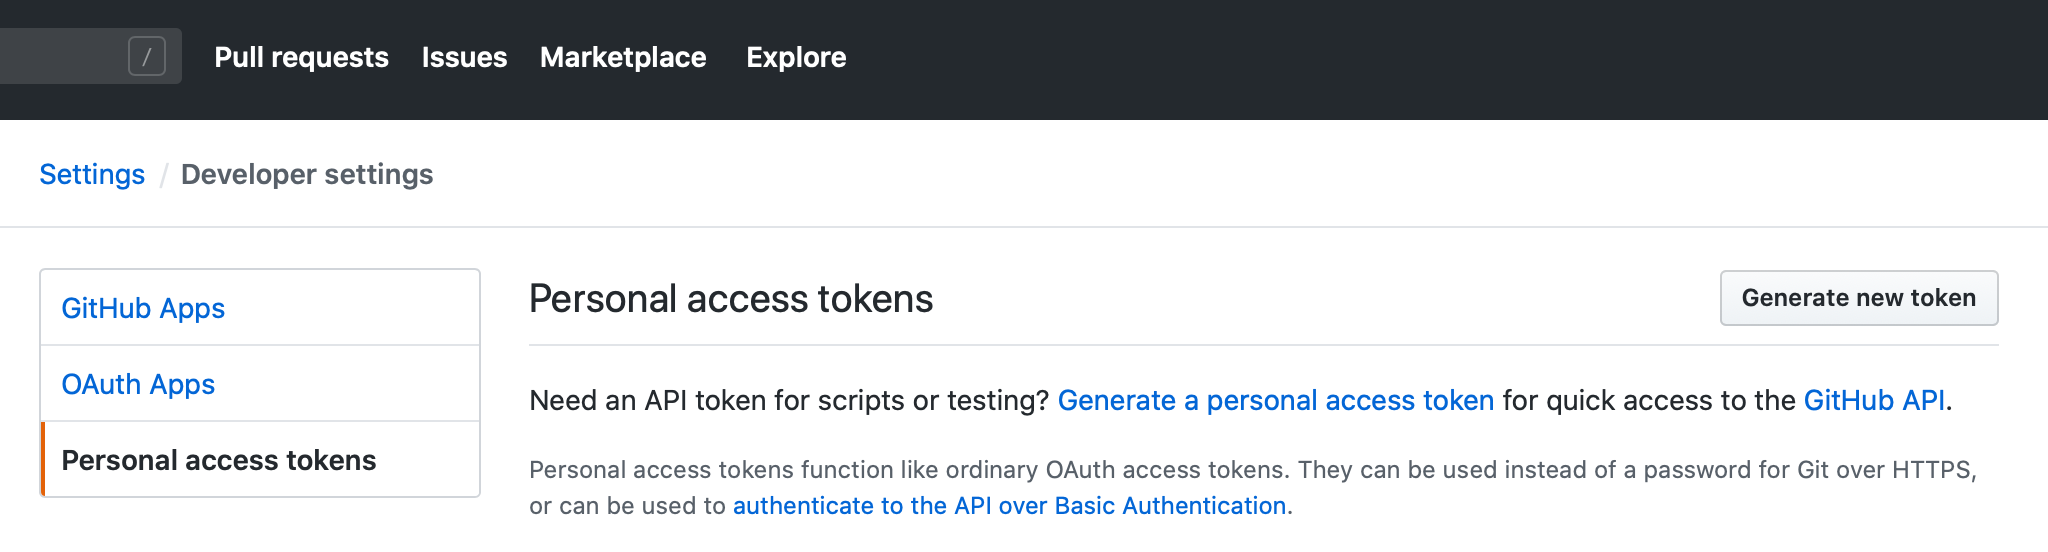

Source -> https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/


In [33]:
display(Image(filename = image_path + "GitHub API Token.png", width=1100, unconfined=True))
print('Source -> https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/')

In [34]:
# Get GitHub handle and token for GitHub API:
def get_GitHub_Handle(GitHub_handle_token_fileName):
    currentDirectory = os.getcwd()
    path_fileName = currentDirectory + '/' + GitHub_handle_token_fileName
    handle_token_file = open(path_fileName)
    
    handle_token_KEY = []
    for i in handle_token_file:
        handle_token_KEY.append(i)
        
    GitHub_Handle = handle_token_KEY[0].strip('\\f0\\fs24 \\cf0 YOUR_GITHUB_HANDLE = \\\n')
    GitHub_Token = handle_token_KEY[1].strip('YOUR_PERSONAL_TOKEN = }')
    
    return str(GitHub_Handle), str(GitHub_Token)


In [35]:
GitHub_Handle, GitHub_Token = get_GitHub_Handle('GitHub_Handle_Token.txt')

# print(GitHub_Handle)
# print(GitHub_Token)

## 5.3 Create a function that grabs all the names of the starred repos:

In [36]:
# Save the auth:
myun = GitHub_Handle
mypw = GitHub_Token

In [37]:
# Initialise the list of repos:
my_starred_repos = []

# User Defined Func:
def get_my_starred_repos():
    resp_list = []
    last_resp = ''
    
    first_url_to_get = 'https://api.github.com/user/starred'
    first_url_resp = requests.get(first_url_to_get, auth=(myun, mypw))
    
    last_resp = first_url_resp
    resp_list.append(json.loads(first_url_resp.text))
    
    while last_resp.links.get('next'):
        next_url_to_get = last_resp.links['next']['url']
        next_url_resp = requests.get(next_url_to_get, auth=(myun, mypw))
        
        last_resp = next_url_resp
        resp_list.append(json.loads(next_url_resp.text))
        
    for i in resp_list:
        for j in i:
            msr = j['html_url']
            my_starred_repos.append(msr)

In [38]:
# Apply the function above to grab the repos:
get_my_starred_repos()

In [39]:
# Inspect the list:
my_starred_repos

['https://github.com/cchi/rnn-viral',
 'https://github.com/cchi/TensorFlow-Tutorials',
 'https://github.com/justmarkham/DataSciencePython',
 'https://github.com/justmarkham/Machine-Learning-Tutorials',
 'https://github.com/justmarkham/machine-learning-for-software-engineers',
 'https://github.com/justmarkham/scikit-learn-videos',
 'https://github.com/justmarkham/pandas-videos',
 'https://github.com/justmarkham/pycon-2019-tutorial',
 'https://github.com/pytorch/pytorch',
 'https://github.com/awesomedata/awesome-public-datasets',
 'https://github.com/mtdvio/every-programmer-should-know',
 'https://github.com/jwasham/coding-interview-university',
 'https://github.com/tensorflow/tensorflow',
 'https://github.com/keon/algorithms',
 'https://github.com/scikit-learn/scikit-learn',
 'https://github.com/josephmisiti/awesome-machine-learning',
 'https://github.com/academic/awesome-datascience',
 'https://github.com/rasbt/pattern_classification',
 'https://github.com/ogrisel/parallel_ml_tutorial'

## 5.4 Parse out the User names for each of the repos, to retriece the libraries/repos these users have starred:

In [40]:
# Initialise the Users list:
my_starred_users = []

# For-loop to get the usernames:
for link in my_starred_repos:
    right_split = link.split('.com/')[1]
    starred_user = right_split.split('/')[0]
    my_starred_users.append(starred_user)
    
# Inspect the list of Starred Users pulled from the repos:
my_starred_users

['cchi',
 'cchi',
 'justmarkham',
 'justmarkham',
 'justmarkham',
 'justmarkham',
 'justmarkham',
 'justmarkham',
 'pytorch',
 'awesomedata',
 'mtdvio',
 'jwasham',
 'tensorflow',
 'keon',
 'scikit-learn',
 'josephmisiti',
 'academic',
 'rasbt',
 'ogrisel',
 'ChristosChristofidis',
 'rich-iannone',
 'awesome-spark',
 'satwikkansal',
 'AIZOOTech',
 'PeterWang512',
 'vinta',
 'huggingface',
 'swisskyrepo',
 'kdn251',
 'yangshun']

## 5.5 Grab the repos that these Users have starred themselves:

In [41]:
# Initialise the dict: based on my starred users.
starred_repos = {k: [] for k in set(my_starred_users)}

def get_starred_by_user(user_name):
    starred_resp_list = []
    last_resp = ''
    
    first_url_to_get = 'https://api.github.com/users/' + user_name + '/starred'
    first_url_resp = requests.get(first_url_to_get, auth=(myun, mypw))
    
    last_resp = first_url_resp
    starred_resp_list.append(json.loads(first_url_resp.text))
    
    while last_resp.links.get('next'):
        next_url_to_get = last_resp.links['next']['url']
        next_url_resp = requests.get(next_url_to_get, auth=(myun, mypw))
        
        last_resp = next_url_resp
        starred_resp_list.append(json.loads(next_url_resp.text))
        
    for i in starred_resp_list:
        for j in i:
            sr = j['html_url']
            starred_repos.get(user_name).append(sr)

#### Apply the function above:

This part may take longer to run as it depends on the number of repos these users have starred.

In [42]:
for usr in list(set(my_starred_users)):
    print(usr)
    
    try:
        get_starred_by_user(usr)
    except:
        print('Failed for user -> ', usr)

pytorch
tensorflow
kdn251
rich-iannone
scikit-learn
academic
AIZOOTech
ChristosChristofidis
swisskyrepo
awesome-spark
yangshun
justmarkham
vinta
awesomedata
mtdvio
rasbt
PeterWang512
jwasham
huggingface
josephmisiti
satwikkansal
keon
cchi
ogrisel


In [43]:
# Inspect:
starred_repos['kdn251']

['https://github.com/fpereiro/backendlore',
 'https://github.com/kdn251/interviews',
 'https://github.com/k88hudson/git-flight-rules',
 'https://github.com/kamranahmedse/design-patterns-for-humans',
 'https://github.com/kalperen/InterviewGuide',
 'https://github.com/amix/vimrc',
 'https://github.com/tylermcginnis/react-course-curriculum',
 'https://github.com/LeCoupa/awesome-cheatsheets',
 'https://github.com/h5bp/Front-end-Developer-Interview-Questions',
 'https://github.com/llSourcell/Learn_Machine_Learning_in_3_Months',
 'https://github.com/norvig/pytudes',
 'https://github.com/kdn251/applied-internet-technology',
 'https://github.com/kdn251/mnist',
 'https://github.com/thedaviddias/Front-End-Checklist',
 'https://github.com/yangshun/tech-interview-handbook',
 'https://github.com/statico/dotfiles',
 'https://github.com/jivoi/awesome-ml-for-cybersecurity',
 'https://github.com/j-delaney/easy-application',
 'https://github.com/davidrosenberg/mlcourse',
 'https://github.com/bmorelli25/

In [44]:
# Inspect:
starred_repos['yangshun']

['https://github.com/turnerlabs/s3-docusaurus-sync-action',
 'https://github.com/facebookexperimental/rome',
 'https://github.com/elviswolcott/remark-admonitions',
 'https://github.com/alexpate/awesome-design-systems',
 'https://github.com/yangshun/delete-github-forks',
 'https://github.com/themgoncalves/react-loadable-ssr-addon',
 'https://github.com/facebookexperimental/eden',
 'https://github.com/facebook/docusaurus',
 'https://github.com/jordwalke/navigating-reason',
 'https://github.com/sorbet/sorbet',
 'https://github.com/shawnkoh/SoftMark',
 'https://github.com/BuckleScript/bucklescript',
 'https://github.com/jamiebuilds/reduxxx',
 'https://github.com/get-alex/alex',
 'https://github.com/revery-ui/revery',
 'https://github.com/gothinkster/realworld',
 'https://github.com/micromark/micromark',
 'https://github.com/unifiedjs/handbook',
 'https://github.com/facebookresearch/hydra',
 'https://github.com/tree-sitter/tree-sitter',
 'https://github.com/bloc97/Anime4K',
 'https://github

#### Check for duplicates of starred repos by these users:

NOTE alternative code: set(l1).intersection(l2)

In [45]:
# Find duplicates from both list:
l1 = starred_repos['kdn251']
l2 = starred_repos['yangshun']

set(l1) & set(l2)

{'https://github.com/EbookFoundation/free-programming-books',
 'https://github.com/MaximAbramchuck/awesome-interview-questions',
 'https://github.com/ZuzooVn/machine-learning-for-software-engineers',
 'https://github.com/alex/what-happens-when',
 'https://github.com/donnemartin/system-design-primer',
 'https://github.com/elsewhencode/project-guidelines',
 'https://github.com/forter/security-101-for-saas-startups',
 'https://github.com/h5bp/Front-end-Developer-Interview-Questions',
 'https://github.com/jwasham/coding-interview-university',
 'https://github.com/k88hudson/git-flight-rules',
 'https://github.com/kamranahmedse/design-patterns-for-humans',
 'https://github.com/kamranahmedse/developer-roadmap',
 'https://github.com/kdn251/interviews',
 'https://github.com/keon/algorithms',
 'https://github.com/mtdvio/every-programmer-should-know',
 'https://github.com/thedaviddias/Front-End-Checklist',
 'https://github.com/yangshun/tech-interview-handbook'}

In [46]:
# Double Check:
if 'free-programming-books' in str(l1):
    print('yes')
else:
    print('No')

yes


In [47]:
if 'free-programming-books' in str(l2):
    print('yes')
else:
    print('No')

yes


As it can be seen, both these GitHub users do have overlapping starred repos that they were interested in. So it would make senese to reduce the compute workload by reducing these extra calls of duplicate repos amongst the users.

## 5.6 Reduce duplicate calls:

###  Build a feature set that includes all the starred repos of these users that was starred by you:

In [48]:
# Extract the value(repos) from the Key, value pairs:
repo_vocab = [item for sl in list(starred_repos.values()) for item in sl]

### Convert the list of repos in set to remove duplicates:

In [49]:
repo_set = list(set(repo_vocab))

In [50]:
# Inspect the first 10 repos:
repo_set[:10]

['https://github.com/estools/esquery',
 'https://github.com/atom/atom',
 'https://github.com/lemire/simdjson',
 'https://github.com/nigma/django-easy-pjax',
 'https://github.com/torch/tutorials',
 'https://github.com/sryza/spark-timeseries',
 'https://github.com/BartoszMilewski/Okasaki',
 'https://github.com/josephmisiti/Bookmarkly',
 'https://github.com/JerrySievert/mongolike',
 'https://github.com/darkwing/LazyLoad']

### Check how many repos there are:

In [51]:
len(repo_vocab)

7238

### Create a binary vector (1 or 0) for every repository starred or not:

With the full feature set or repos vocabulary (repo_set), create a binary vector of the following:
- 1 for repos that other users have starred.
- 0 for repos that other users have NOT starred.

In [52]:
# Initialise the list:
all_user_vector = []

# For-loop to update the list:
for k, v in starred_repos.items():
    user_vector = []
    
    for url in repo_set:
        if url in v:
            user_vector.extend([1])
        else:
            user_vector.extend([0])
    
    all_user_vector.append(user_vector)

Here, it checks for every user on whether they had starred every repos in our repo_set. If they did, it is set to 1 and if they did not, it is set to 0.

### Save the list to Dataframe:

In [53]:
df_repos = pd.DataFrame(all_user_vector, columns = repo_set, index = starred_repos.keys())
df_repos

,https://github.com/estools/esquery,https://github.com/atom/atom,https://github.com/lemire/simdjson,https://github.com/nigma/django-easy-pjax,https://github.com/torch/tutorials,https://github.com/sryza/spark-timeseries,https://github.com/BartoszMilewski/Okasaki,https://github.com/josephmisiti/Bookmarkly,https://github.com/JerrySievert/mongolike,https://github.com/darkwing/LazyLoad,...,https://github.com/llSourcell/Policy_Gradients_to_beat_Pong,https://github.com/saffsd/langid.py,https://github.com/sigopt/sigopt-examples,https://github.com/pyca/bcrypt,https://github.com/substack/node-mkdirp,https://github.com/stuartsierra/clojure-hadoop,https://github.com/mozilla/fireplace,https://github.com/kalperen/InterviewGuide,https://github.com/cookiecutter/cookiecutter,https://github.com/thedaviddias/Front-End-Checklist
pytorch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tensorflow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kdn251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
rich-iannone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
scikit-learn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
academic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIZOOTech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ChristosChristofidis,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
swisskyrepo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
awesome-spark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### For the purpose of comparison to your personal GitHub, add a row containing your GitHub handle:

In [54]:
my_repo_comp = []
for i in df_repos.columns:
    if i in my_starred_repos:
        my_repo_comp.append(1)
    else:
        my_repo_comp.append(0)
        
my_rc = pd.Series(my_repo_comp).to_frame(myun).T

In [55]:
# Inspect:
my_rc

,0,1,2,3,4,5,6,7,8,9,...,6310,6311,6312,6313,6314,6315,6316,6317,6318,6319
ylee9107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Concat the row to the main dataframe:
my_rc.columns = df_repos.columns

df_repos_full = pd.concat([df_repos, my_rc])

df_repos_full.head()

,https://github.com/estools/esquery,https://github.com/atom/atom,https://github.com/lemire/simdjson,https://github.com/nigma/django-easy-pjax,https://github.com/torch/tutorials,https://github.com/sryza/spark-timeseries,https://github.com/BartoszMilewski/Okasaki,https://github.com/josephmisiti/Bookmarkly,https://github.com/JerrySievert/mongolike,https://github.com/darkwing/LazyLoad,...,https://github.com/llSourcell/Policy_Gradients_to_beat_Pong,https://github.com/saffsd/langid.py,https://github.com/sigopt/sigopt-examples,https://github.com/pyca/bcrypt,https://github.com/substack/node-mkdirp,https://github.com/stuartsierra/clojure-hadoop,https://github.com/mozilla/fireplace,https://github.com/kalperen/InterviewGuide,https://github.com/cookiecutter/cookiecutter,https://github.com/thedaviddias/Front-End-Checklist
pytorch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tensorflow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kdn251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
rich-iannone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
scikit-learn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Check:
print('Old DataFrame length of rows is: ', len(df_repos))
print('New DataFrame length of rows is: ', len(df_repos_full))


Old DataFrame length of rows is:  24
New DataFrame length of rows is:  25


Your GitHub handle has been added to the new DataFrame.

## 6 Calculate the similarity between your GitHub Handle and the other Users:

This section uses the 'pearsonr' function. 

## 6.1 Import the required package:

In [58]:
from scipy.stats import pearsonr

## 6.2: Calculate the similarity Score:

This section takes your vector (your GitHub Handle) from the last row of the dataframe, and compares it to every other user's vector in order to produce a centered cosine similarity (Pearson Corr. Coeff.). Some of the NaN values found is because that particular user did not starred any other repos. 

In [59]:
# Initialise the Dict:
similarity_score = {}

# For-loop to compare the similarity:
for i in range(len(df_repos_full)):
    sim_score_pearsonr = pearsonr(df_repos_full.iloc[-1,:], df_repos_full.iloc[i,:])
    similarity_score.update({i: sim_score_pearsonr[0]})
    
# Save to DataFrame:
df_similarity = pd.Series(similarity_score).to_frame('similarity')

/Users/y.s.lee/opt/anaconda3/envs/Py37Work/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [60]:
# Inspect:
similarity_score

{0: nan,
 1: nan,
 2: 0.17225058365684515,
 3: 0.013866131264911288,
 4: nan,
 5: nan,
 6: -0.000924008559230067,
 7: 0.03252952006631399,
 8: -0.0006533210170006215,
 9: nan,
 10: 0.022671291853412878,
 11: 0.1139398192320927,
 12: 0.06002543607293639,
 13: nan,
 14: nan,
 15: 0.08142151933940361,
 16: -0.002067455295070127,
 17: 0.07609870481469799,
 18: nan,
 19: 0.026480701490395404,
 20: 0.13984467122000616,
 21: 0.08360702003584528,
 22: 0.2630895777143887,
 23: 0.0057193541918174095,
 24: 1.0}

In [61]:
# Inspect:
df_similarity

,similarity
0,NaN
1,NaN
2,0.172251
3,0.013866
4,NaN
5,NaN
6,-0.000924
7,0.032530
8,-0.000653
9,NaN


## 6.3 Sort the values to find the most similar repos:

In [62]:
# df_similarity =  df_similarity.sort_values(by = 'similarity', ascending = False)
# df_similarity

In [63]:
df_similarity.sort_values(by = 'similarity', ascending = False)


,similarity
24,1.000000
22,0.263090
2,0.172251
20,0.139845
11,0.113940
21,0.083607
15,0.081422
17,0.076099
12,0.060025
7,0.032530


### The table above shows the most similar users that can be used for recommendations. Make sure to ignore the user with the perfect similarity score of 1 as this is you.

## 7 Take a look at these Repos which are similar:

In [64]:
# Inspect the Handle names of these repos:
df_repos_full.index[1]

'tensorflow'

In [65]:
df_repos_full.index[8]

'swisskyrepo'

In [66]:
df_repos_full.index[5]

'academic'

## 7.1 Print out the list of Repos:

In [67]:
# Clean up the DataFrame:
df_similarity_copy = df_similarity.copy()
df_similarity_copy = df_similarity_copy.iloc[1:]
df_similarity_copy = df_similarity_copy.dropna()
df_similarity_copy

,similarity
2,0.172251
3,0.013866
6,-0.000924
7,0.032530
8,-0.000653
10,0.022671
11,0.113940
12,0.060025
15,0.081422
16,-0.002067


In [68]:
# Print:
list_sim_repo_users = []

for i in df_similarity_copy.index:
    repos_user_handle = df_repos_full.index[i]
    repo_user_url = 'https://github.com/' + str(repos_user_handle)
    list_sim_repo_users.append(repo_user_url)

In [69]:
# Inspect the new list:
list_sim_repo_users, len(list_sim_repo_users)

(['https://github.com/kdn251',
  'https://github.com/rich-iannone',
  'https://github.com/AIZOOTech',
  'https://github.com/ChristosChristofidis',
  'https://github.com/swisskyrepo',
  'https://github.com/yangshun',
  'https://github.com/justmarkham',
  'https://github.com/vinta',
  'https://github.com/rasbt',
  'https://github.com/PeterWang512',
  'https://github.com/jwasham',
  'https://github.com/josephmisiti',
  'https://github.com/satwikkansal',
  'https://github.com/keon',
  'https://github.com/cchi',
  'https://github.com/ogrisel',
  'https://github.com/ylee9107'],
 17)

In [70]:
# Compare the new list of repos with your starred repos:
my_starred_repos

['https://github.com/cchi/rnn-viral',
 'https://github.com/cchi/TensorFlow-Tutorials',
 'https://github.com/justmarkham/DataSciencePython',
 'https://github.com/justmarkham/Machine-Learning-Tutorials',
 'https://github.com/justmarkham/machine-learning-for-software-engineers',
 'https://github.com/justmarkham/scikit-learn-videos',
 'https://github.com/justmarkham/pandas-videos',
 'https://github.com/justmarkham/pycon-2019-tutorial',
 'https://github.com/pytorch/pytorch',
 'https://github.com/awesomedata/awesome-public-datasets',
 'https://github.com/mtdvio/every-programmer-should-know',
 'https://github.com/jwasham/coding-interview-university',
 'https://github.com/tensorflow/tensorflow',
 'https://github.com/keon/algorithms',
 'https://github.com/scikit-learn/scikit-learn',
 'https://github.com/josephmisiti/awesome-machine-learning',
 'https://github.com/academic/awesome-datascience',
 'https://github.com/rasbt/pattern_classification',
 'https://github.com/ogrisel/parallel_ml_tutorial'

As it can be seen, it was able to generate new users to follow.

## 8 Gather the links of Repos that the other users have starred but you did not:

This section creates a DataFrame (sparse matrix) of the repos that you have starred and those similar to you.

In [71]:
all_recs = df_repos_full.iloc[list(df_similarity.index), :].T
all_recs

,pytorch,tensorflow,kdn251,rich-iannone,scikit-learn,academic,AIZOOTech,ChristosChristofidis,swisskyrepo,awesome-spark,...,rasbt,PeterWang512,jwasham,huggingface,josephmisiti,satwikkansal,keon,cchi,ogrisel,ylee9107
https://github.com/estools/esquery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://github.com/atom/atom,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
https://github.com/lemire/simdjson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://github.com/nigma/django-easy-pjax,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
https://github.com/torch/tutorials,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://github.com/stuartsierra/clojure-hadoop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
https://github.com/mozilla/fireplace,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://github.com/kalperen/InterviewGuide,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://github.com/cookiecutter/cookiecutter,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


## 8.1 Check if there are any repos that everyone have starred:

In [72]:
all_recs[ (all_recs == 1).all(axis =1) ]

,pytorch,tensorflow,kdn251,rich-iannone,scikit-learn,academic,AIZOOTech,ChristosChristofidis,swisskyrepo,awesome-spark,...,rasbt,PeterWang512,jwasham,huggingface,josephmisiti,satwikkansal,keon,cchi,ogrisel,ylee9107


Apparently, there arent anything in common. (Note: The dataFrame returns blank)

## 8.2 Check if they have starred repos that you have missed:

In [73]:
str_recs_temp = all_recs[ all_recs[myun] == 0].copy()
str_recs = str_recs_temp.iloc[:, :-1].copy()
str_recs[ (str_recs == 1).all(axis = 1) ]

,pytorch,tensorflow,kdn251,rich-iannone,scikit-learn,academic,AIZOOTech,ChristosChristofidis,swisskyrepo,awesome-spark,...,mtdvio,rasbt,PeterWang512,jwasham,huggingface,josephmisiti,satwikkansal,keon,cchi,ogrisel


It seems like you have not missed out on anything yet. (Print out blank DataFrame)

## 8.3 Check if there are any Repos that at least 2 out of 3 users have starred:

In [74]:
recommended_repos = str_recs.sum(axis = 1).to_frame('total').sort_values(by = 'total', ascending = False)
recommended_repos

,total
https://github.com/MaximAbramchuck/awesome-interview-questions,6
https://github.com/donnemartin/system-design-primer,6
https://github.com/moby/moby,5
https://github.com/faif/python-patterns,5
https://github.com/rushter/MLAlgorithms,5
...,...
https://github.com/DisposaBoy/GoSublime,1
https://github.com/tlrobinson/narwhal,1
https://github.com/sing1ee/elasticsearch-jieba-plugin,1
https://github.com/clarus/redux-ship,1


In [75]:
# Take the top 10 repos:
recommended_repos.index[:10]

Index(['https://github.com/MaximAbramchuck/awesome-interview-questions',
       'https://github.com/donnemartin/system-design-primer',
       'https://github.com/moby/moby',
       'https://github.com/faif/python-patterns',
       'https://github.com/rushter/MLAlgorithms',
       'https://github.com/EbookFoundation/free-programming-books',
       'https://github.com/ZuzooVn/machine-learning-for-software-engineers',
       'https://github.com/tiimgreen/github-cheat-sheet',
       'https://github.com/airbnb/javascript',
       'https://github.com/facebook/react'],
      dtype='object')

### Observation:

The value in 'total' column shows how many of the same repos that these users have starred together. These are definitely repos that would interest you.
__This project have mainly produced recommendations of GitHub Repositories that is based on Collaborative filtering, along with light filtering by using aggregation.__ This project can also be taken further in the future by considering the suggestions below.

## 9 Future Considerations:

- Order the recommendation based on the total number of Stars each of the repositories have received. (Done, by making another call to the GitHub API).
- Improve the results by adding another layer to Content-based filtering. Hybridising the model as mentioned earlier. 
    - Done by creating a set of features from our repository, that consists of topics of interest, then create the feature set by tokenising the names of the repositories already present and their descriptions.
    - This then generate a set of word features for vetting purposes on already found repos (based on Collaborative filtering), which should include words such as Python, Deep Learning, Interviews, Data science. etc. This would also ensure that recommendations are still provided from less similar users but based on your taste.
- Additional Question: What would content-based filtering section of code look like in regards to a DataFrame?
    - The columns: consists of word features (n-grams)
    - The rows: consists of repos from collaborative filtering step.
    - A similarity process can be ran against your own repo for comparison purposes. 